# Data Wrangling

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline 

users = pd.read_csv('takehome_users.csv', encoding="ISO-8859-1")
engagement = pd.read_csv('takehome_user_engagement.csv')

In [58]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [59]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [60]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [61]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [62]:
engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [63]:
# Check for missing data in each of the columns
print ('takehome_users dataset')
print(users.isnull().any())
print ('takehome_users_engagement dataset')
print(engagement.isnull().any())

takehome_users dataset
object_id                     False
creation_time                 False
name                          False
email                         False
creation_source               False
last_session_creation_time     True
opted_in_to_mailing_list      False
enabled_for_marketing_drip    False
org_id                        False
invited_by_user_id             True
dtype: bool
takehome_users_engagement dataset
time_stamp    False
user_id       False
visited       False
dtype: bool


## Identify Adopted User

In [64]:
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])

In [196]:
adopted_dict = {}
for group in engagement.groupby('user_id'):
    user_id = group[0]
    login_counts = len(group[1])
    user_logins = group[1]['time_stamp'].sort_values().reset_index(drop=True)
    
    if login_counts >= 3:
        num = 0
        for i, time in enumerate(user_logins):
            if i < len(user_logins)-2:
                start = time
                end = start + pd.Timedelta('7D')
                next1 = user_logins[i+1]
                next2 = user_logins[i+2]
                if (next1 < end) & (next2<end):
                    num += 1
        if num == 0:
            adopted_dict[user_id] = 0
        else:
            adopted_dict[user_id] = 1
    else:
        adopted_dict[user_id] = 0

In [197]:
count = 0
for key, value in adopted_dict.items():
    if value == True:
        count +=1
print ('There is', count, 'adopted users in this dataset.')

There is 1602 adopted users in this dataset.


In [198]:
users['adopted_user'] = users.object_id.map(adopted_dict)

In [199]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,email_domain,days_since_signup
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0,yahoo,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0,gustr,136.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0,gustr,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0,yahoo,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0,yahoo,5.0


# Cleaning the DataFrame

In [200]:
users['email_domain'] = users['email'].apply(lambda x: x.split('@')[1].split('.')[0])
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')
users['creation_time'] = pd.to_datetime(users['creation_time'])
users['days_since_signup'] = (users['last_session_creation_time'] - users['creation_time']).apply(lambda x: x.days)
users_new = users[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 
                  'org_id', 'invited_by_user_id', 'adopted_user', 'email_domain', 'days_since_signup']]
users_new.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,email_domain,days_since_signup
0,GUEST_INVITE,1,0,11,10803.0,0.0,yahoo,0.0
1,ORG_INVITE,0,0,1,316.0,1.0,gustr,136.0
2,ORG_INVITE,0,0,94,1525.0,0.0,gustr,0.0
3,GUEST_INVITE,0,0,1,5151.0,0.0,yahoo,1.0
4,GUEST_INVITE,0,0,193,5240.0,0.0,yahoo,5.0


# Visualization and Convert Categorical Data

Text(0.5,1,'Adopted User Status by Creation Source')

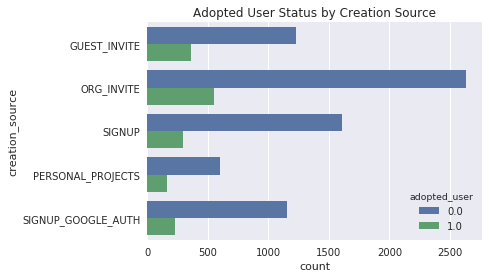

In [201]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(data=users_new, y='creation_source', hue='adopted_user')
plt.title('Adopted User Status by Creation Source')

Text(0.5,1,'Adopted User Status by Mailing List Opt-In')

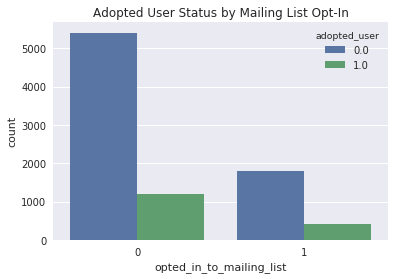

In [202]:
sns.countplot(x='opted_in_to_mailing_list', hue='adopted_user', data=users)
plt.title('Adopted User Status by Mailing List Opt-In')

Text(0.5,1,'Adopted User Status by Marketing Email Drip')

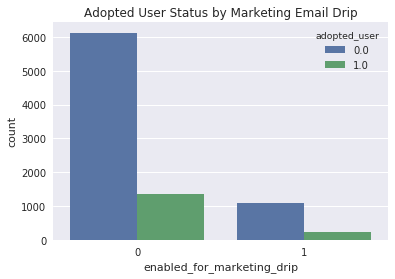

In [203]:
sns.countplot(x='enabled_for_marketing_drip', hue='adopted_user', data=users_new)
plt.title('Adopted User Status by Marketing Email Drip')

Text(0.5,1,'Days Since Signup for Adopted Users')

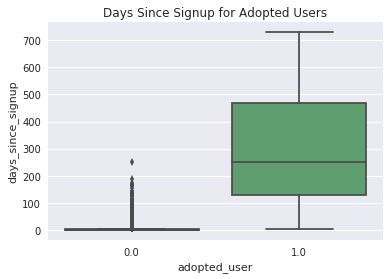

In [204]:
sns.boxplot(y='days_since_signup', x='adopted_user', data=users_new)
plt.title('Days Since Signup for Adopted Users')

In [205]:
print ('There are', len(users_new.email_domain.unique()), 'email domains in this dataset.')

There are 1184 email domains in this dataset.


In [206]:
users_new.email_domain.value_counts().head(10)

gmail         3562
yahoo         2447
jourrapide    1259
cuvox         1202
gustr         1179
hotmail       1165
mumdc            2
luque            2
oqpze            2
rerwl            2
Name: email_domain, dtype: int64

In [207]:
main_domain = ['gmail', 'yahoo', 'jourrapide', 'cuvox', 'gustr', 'hotmail']

In [208]:
users_new.email_domain[~users_new.email_domain.isin(main_domain)] = 'others'

/home/ives/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ives/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/ives/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_n

In [209]:
users_new.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,email_domain,days_since_signup
0,GUEST_INVITE,1,0,11,10803.0,0.0,yahoo,0.0
1,ORG_INVITE,0,0,1,316.0,1.0,gustr,136.0
2,ORG_INVITE,0,0,94,1525.0,0.0,gustr,0.0
3,GUEST_INVITE,0,0,1,5151.0,0.0,yahoo,1.0
4,GUEST_INVITE,0,0,193,5240.0,0.0,yahoo,5.0


Text(0.5,1,'Email Domain for Adopted Users')

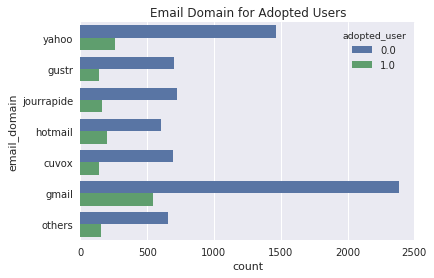

In [210]:
sns.countplot(y='email_domain', hue='adopted_user', data=users_new)
plt.title('Email Domain for Adopted Users')

In [211]:
users_encoded = pd.get_dummies(users_new, columns=['creation_source', 'email_domain'])

In [212]:
users_encoded.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,days_since_signup,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,email_domain_cuvox,email_domain_gmail,email_domain_gustr,email_domain_hotmail,email_domain_jourrapide,email_domain_others,email_domain_yahoo
0,1,0,11,10803.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,316.0,1.0,136.0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,0,94,1525.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,1,5151.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,0,193,5240.0,0.0,5.0,1,0,0,0,0,0,0,0,0,0,0,1


In [213]:
users_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 18 columns):
opted_in_to_mailing_list              12000 non-null int64
enabled_for_marketing_drip            12000 non-null int64
org_id                                12000 non-null int64
invited_by_user_id                    6417 non-null float64
adopted_user                          8823 non-null float64
days_since_signup                     8823 non-null float64
creation_source_GUEST_INVITE          12000 non-null uint8
creation_source_ORG_INVITE            12000 non-null uint8
creation_source_PERSONAL_PROJECTS     12000 non-null uint8
creation_source_SIGNUP                12000 non-null uint8
creation_source_SIGNUP_GOOGLE_AUTH    12000 non-null uint8
email_domain_cuvox                    12000 non-null uint8
email_domain_gmail                    12000 non-null uint8
email_domain_gustr                    12000 non-null uint8
email_domain_hotmail                  12000 non-null uint8
ema

In [214]:
users_encoded = users_encoded.drop(['invited_by_user_id', 'org_id'], axis=1)

In [215]:
users_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 16 columns):
opted_in_to_mailing_list              12000 non-null int64
enabled_for_marketing_drip            12000 non-null int64
adopted_user                          8823 non-null float64
days_since_signup                     8823 non-null float64
creation_source_GUEST_INVITE          12000 non-null uint8
creation_source_ORG_INVITE            12000 non-null uint8
creation_source_PERSONAL_PROJECTS     12000 non-null uint8
creation_source_SIGNUP                12000 non-null uint8
creation_source_SIGNUP_GOOGLE_AUTH    12000 non-null uint8
email_domain_cuvox                    12000 non-null uint8
email_domain_gmail                    12000 non-null uint8
email_domain_gustr                    12000 non-null uint8
email_domain_hotmail                  12000 non-null uint8
email_domain_jourrapide               12000 non-null uint8
email_domain_others                   12000 non-null uint8
emai

In [216]:
users_encoded = users_encoded.dropna()

# MODEL SELECTION

In [217]:
#Split dataset into target and features
X = users_encoded.drop('adopted_user', axis=1)
y = users_encoded['adopted_user']

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234) 

In [220]:
lr = LogisticRegression()
parameters = {'C':[0.001, 0.01, 0.1], 
             'tol':[1e-5, 1e-4, 1e-3]}
clf = GridSearchCV(lr, parameters, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

{'C': 0.1, 'tol': 1e-05}

In [223]:
#Training the Logistic Model with the best parameters
lr = LogisticRegression(C=0.01, tol=1e-5)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print ('The accuracy score is', accuracy_score(y_test, y_pred))

The accuracy score is 0.9671388101983003


In [225]:
print (classification_report(y_test, y_pred, target_names=['not adopted_user', 'adopted_user']))

                  precision    recall  f1-score   support

not adopted_user       0.97      0.99      0.98      1450
    adopted_user       0.94      0.88      0.90       315

     avg / total       0.97      0.97      0.97      1765



In [248]:
#Explore feature importance 
coefficients = abs(lr.coef_).transpose()
features = X.columns

In [261]:
feature_importance = {}
for i, coeff in enumerate(coefficients):
    feature_importance[features[i]] = coeff
    
feature_importance_df = pd.DataFrame.from_dict(feature_importance, orient='index', columns=['feature_importance'])

In [269]:
feature_importance_df.sort_values(by=['feature_importance'], ascending=False)

,feature_importance
creation_source_ORG_INVITE,0.617860
creation_source_SIGNUP,0.518254
email_domain_gmail,0.478588
email_domain_yahoo,0.418533
creation_source_GUEST_INVITE,0.402666
creation_source_SIGNUP_GOOGLE_AUTH,0.348335
email_domain_jourrapide,0.293633
opted_in_to_mailing_list,0.264235
email_domain_others,0.257010
creation_source_PERSONAL_PROJECTS,0.252259
